In [1]:
# Standard imports
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn-white')
import tensorflow as tf
import shutil
import os, sys
from time import time
import pandas as pd



from Jet_Observables import NSubJettiness, Thrust, Background, Disk, Ellipse, Circle
from src.Observables import CustomObservable
# # eKDS Stuff
# from src.Graph import Background, Circle, Disk
# from src.eKDS import Graph, eKDS, emd
from src.utils.plot_utils import load_data, plot, plot_event, make_gif, timer_func
from src.datasets import generate_ring_like_event
from utils import load_dataset

/home/rikab/miniconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


(250,) [1.83151334e-02 9.31022188e-01 3.55264775e-01 3.18995248e-02
 2.70234430e-02 4.94869224e-01 5.42613803e-01 1.77693006e-01
 3.13722702e-01 1.50448940e-02 3.76594310e-03 4.10964541e-03
 1.01930457e+00 1.80650121e-04 9.82923213e-01 9.69831715e-01
 7.28097013e-01 2.49226771e-02 6.15530667e-01 1.19363310e-04
 9.17214183e-01 9.10954004e-01 9.76486231e-01 1.56862033e-03
 8.35839186e-02 1.00458803e+00 9.00125644e-01 6.97939341e-04
 4.20056192e-01 1.54540892e-01 5.06878674e-04 7.89655156e-01
 2.22435633e-02 1.68972851e-02 3.00891053e-04 2.30515220e-03
 7.92137053e-02 8.46711022e-01 6.42720699e-03 4.53828001e-01
 9.81769686e-01 1.02835174e+00 4.50751541e-02 8.92549666e-01
 4.46117519e-03 9.72436449e-01 2.19012060e-03 4.13309588e-01
 7.64245355e-03 2.49227470e-03 1.00459570e+00 1.36307349e-02
 9.81437010e-01 5.06190200e-03 3.62408135e-02 1.00054474e+00
 9.32015836e-01 3.92278487e-02 1.00171029e+00 1.12602654e-01
 5.06729177e-02 1.09540706e+00 5.54309499e-02 8.88825576e-01
 2.07147460e-03 5

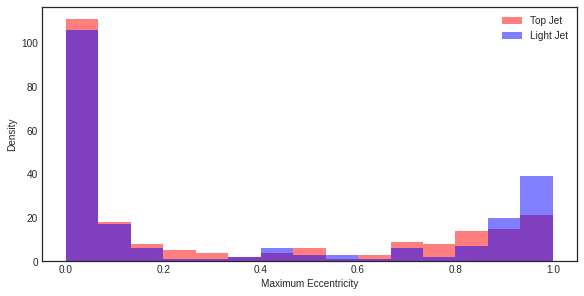

In [7]:
import pandas as pd



df = pd.read_csv("dataframe_1ellipsiness_plus_pileup.csv")
eccentricities = df["eccentricity_1"]

signal_df = pd.read_csv("dataframe_1ellipsiness.csv")[:250]
background_df = pd.read_csv("dataframe_1ellipsiness.csv")[250:]


fig, ax = plt.subplots(constrained_layout=True, figsize = (8,4))



observables = ["eccentricity_1"]
signal_eccentricities = np.amax(signal_df[observables].to_numpy(), axis = 1)
background_eccentricities = np.amax(background_df[observables].to_numpy(), axis = 1)
print(signal_eccentricities.shape, background_eccentricities)

plt.hist(signal_eccentricities, range = (0,1), bins = 15,  alpha = 0.5, color = "red", label = "Top Jet")
plt.hist(background_eccentricities, range = (0,1), bins = 15, alpha = 0.5, color = "blue", label = "Light Jet")
plt.xlabel("Maximum Eccentricity")
plt.ylabel("Density")
plt.legend()


In [18]:
R = 1.0


def generate_ring_data(N):

    events = []
    for i in range(N):

        radius = np.abs(np.random.normal() * 0.25 + 0.75)
        width = np.random.normal() * 0.01 + 0.1
        center =np.random.random(size = (1, 2)) * 1 - 0.5
        n_sig = np.random.poisson(lam = 50)
        n_bg = np.random.poisson(lam = 250)
        percent_bg = np.random.random() * 0.1 + 0.3
        events.append(generate_ring_like_event(n_sig, n_bg, percent_bg, center, radius, width))

        print(radius, percent_bg)

    return events


event = generate_ring_like_event(50, 250, 0.25, (0.55, 0.40), 0.75, 0.10)


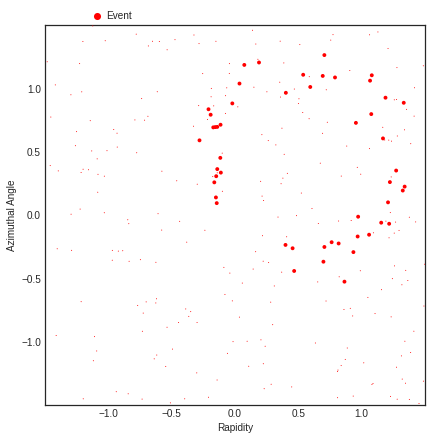

In [19]:
plot_event(event[0], event[1], R, filename="photoshoot/event.png")
plot_event(event[0], event[1], R)

In [22]:
obs = Circle( (-0.0,0.0), R/2, z = 0.5, R = 1.0, N = 75)
training_config_dict = {"epochs" : 500,
                        "optimizer" : tf.keras.optimizers.Adam(lr = 0.01),
                        "verbose" : False,
                        "early_stop" : 25,
                        "resample" : True}
params = obs.calculate(event, training_config_dict=training_config_dict, plot_filename="photoshoot/circle.png")
print(params)

{'EMD': 0.3214718931762861, 'Center': array([0.49984476, 0.35938055]), 'radius': <tf.Tensor: shape=(), dtype=float64, numpy=0.7687384976023766>, 'z': 0.5}


In [ ]:
R = 0.8
beta = 1.0

# Build Observable
_3subjettinesss = NSubJettiness(
                    initializer = "kt", N = 3, R = R, beta = beta)

# Calculation Parameters
training_config_dict = {"epochs" : 500,
                        "optimizer" : tf.keras.optimizers.Adam(lr = 0.01),
                        } 
# Calculate!
obs.calculate(event, training_config_dict)